### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [3]:
import warnings
warnings.filterwarnings('ignore')

#### 1. Import the necessary packages - 2.5 marks

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport


#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [81]:
# Load the data into pandas dataframe
data = pd.read_csv("C:\\Users\\garrettikekhua\\Downloads\\PGD-AIML\\Program Content\\Foundations for AIML\\Project1_MovieLens Data Exploration\\Data.csv")
item = pd.read_csv("C:\\Users\\garrettikekhua\Downloads\\PGD-AIML\\Program Content\\Foundations for AIML\\Project1_MovieLens Data Exploration\\item.csv")
user = pd.read_csv("C:\\Users\\garrettikekhua\\Downloads\\PGD-AIML\\Program Content\\Foundations for AIML\\Project1_MovieLens Data Exploration\\user.csv")



In [6]:
data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [8]:
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [18]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [10]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [20]:
data.shape

(100000, 4)

In [21]:
item.shape

(1681, 22)

In [22]:
user.shape

(943, 5)

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
movie id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


In [12]:
item.describe().T

,count,mean,std,min,25%,50%,75%,max
movie id,1681.0,841.841761,485.638077,1.0,422.0,842.0,1262.0,1682.0
unknown,1681.0,0.000595,0.024390,0.0,0.0,0.0,0.0,1.0
Action,1681.0,0.149316,0.356506,0.0,0.0,0.0,0.0,1.0
Adventure,1681.0,0.080309,0.271852,0.0,0.0,0.0,0.0,1.0
Animation,1681.0,0.024985,0.156126,0.0,0.0,0.0,0.0,1.0
Childrens,1681.0,0.072576,0.259516,0.0,0.0,0.0,0.0,1.0
Comedy,1681.0,0.300416,0.458576,0.0,0.0,0.0,1.0,1.0
Crime,1681.0,0.064842,0.246321,0.0,0.0,0.0,0.0,1.0
Documentary,1681.0,0.029744,0.169931,0.0,0.0,0.0,0.0,1.0
Drama,1681.0,0.431291,0.495404,0.0,0.0,0.0,1.0,1.0


In [13]:
user.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,943.0,472.000000,272.364951,1.0,236.5,472.0,707.5,943.0
age,943.0,34.051962,12.192740,7.0,25.0,31.0,43.0,73.0


In [14]:
data.isnull().values.any()

False

In [15]:
item.isnull().values.any()

False

In [16]:
user.isnull().values.any()

False

In [17]:
data.isnull().sum().sum()  # Total number of recognised missing values in the entire dataframe

0

In [18]:
item.isnull().sum().sum()

0

In [19]:
user.isnull().sum().sum()

0

In [20]:
# number of missing values (only the ones recognised as missing values) in each of the attributes
pd.DataFrame( data.isnull().sum(), columns= ['# of missing values/col'])

,# of missing values/col
user id,0
movie id,0
rating,0
timestamp,0


In [21]:
pd.DataFrame( item.isnull().sum(), columns= ['# of missing values/col'])

,# of missing values/col
movie id,0
movie title,0
release date,0
unknown,0
Action,0
Adventure,0
Animation,0
Childrens,0
Comedy,0
Crime,0


In [22]:
pd.DataFrame( user.isnull().sum(), columns= ['# of missing values/col'])

,# of missing values/col
user id,0
age,0
gender,0
occupation,0
zip code,0


#### 4. Find the number of movies per genre using the item data - 5 marks

In [23]:
genre_T = item.drop('movie id',axis=1)

In [24]:
# use sum on the default axis
genre_T.sum(numeric_only=True)

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [ ]:
#hint: use sum on the axis = 1

In [25]:
genre_titles1 = item.set_index('movie title')
genre_titles1.head()

,movie id,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie title,,,,,,,,,,,,,,,,,,,,,
Toy Story,1,01-Jan-1995,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
GoldenEye,2,01-Jan-1995,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Four Rooms,3,01-Jan-1995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Get Shorty,4,01-Jan-1995,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Copycat,5,01-Jan-1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
genre_titles2 = genre_titles1.drop('movie id', axis=1)
item_Q5 = genre_titles2.sum(axis=1, numeric_only=True)
print(item_Q5)

movie title
Toy Story                              3
GoldenEye                              3
Four Rooms                             1
Get Shorty                             3
Copycat                                3
                                      ..
Mat' i syn                             1
B. Monkey                              2
Sliding Doors                          2
You So Crazy                           1
Scream of Stone (Schrei aus Stein)     1
Length: 1681, dtype: int64


In [27]:
print(item_Q5>1)

movie title
Toy Story                               True
GoldenEye                               True
Four Rooms                             False
Get Shorty                              True
Copycat                                 True
                                       ...  
Mat' i syn                             False
B. Monkey                               True
Sliding Doors                           True
You So Crazy                           False
Scream of Stone (Schrei aus Stein)     False
Length: 1681, dtype: bool


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [28]:
print(item[item.unknown>0])

      movie id    movie title release date  unknown  Action  Adventure  \
1371      1373  Good Morning    4-Feb-1971        1       0          0   

      Animation  Childrens  Comedy  Crime  ...  Fantasy  Film-Noir  Horror  \
1371          0          0       0      0  ...        0          0       0   

      Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
1371        0        0        0       0         0    0        0  

[1 rows x 22 columns]


In [29]:
item_Q6 = item.drop(item[item.unknown>0].index)
print(item_Q6.shape)
print(item.shape)

(1680, 22)
(1681, 22)


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [30]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


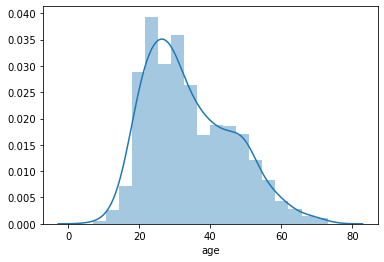

In [31]:
#your answers here
sns.distplot(user['age']);

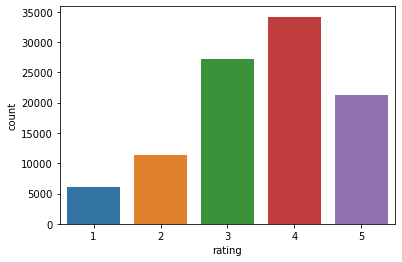

In [32]:
sns.countplot(data['rating']);

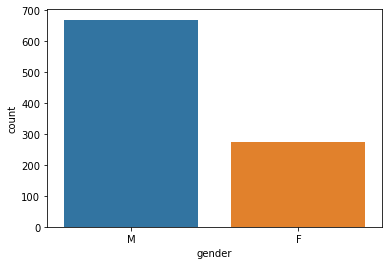

In [33]:
sns.countplot(user['gender']);

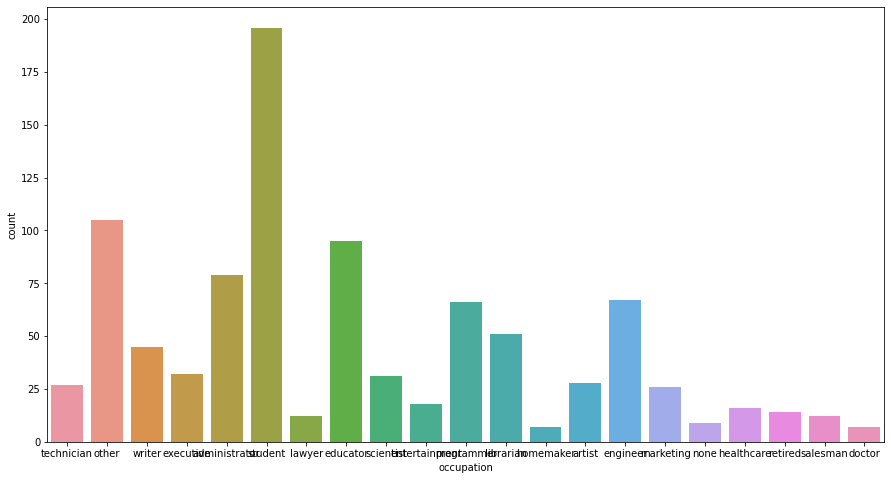

In [34]:
plt.figure(figsize=(15,8)) # makes the plot wider
sns.countplot(user['occupation']);

In [82]:
item_RDate = item['release date'].str.split("-",n=-1,expand=True)
item_RDate[2].head()


0    1995
1    1995
2    1995
3    1995
4    1995
Name: 2, dtype: object

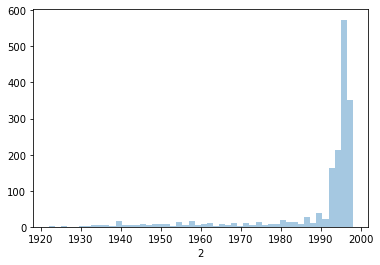

In [85]:
sns.distplot(item_RDate[2], kde=False);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [87]:
item['release year'] = pd.DataFrame(item_RDate[2])
Q8 = item.drop('movie id',axis=1)
Q8.head()

,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
1,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
4,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1995


In [113]:
#Q8 = Q8.set_index('release year')
Q8.groupby('release year')
Q8.head()


,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,,,,
1995,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1995,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1995,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1995,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1995,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [109]:
#data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],
                    #ascending=True).head(10).plot(x='country',y='suicides_no',kind='bar', figsize=(15,5))
    
genres_sum = pd.Series(Q8.sum(numeric_only=True))
print(genres_sum)

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64


In [ ]:
#Your answer here

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [ ]:
#your answer here

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [120]:
all_df = pd.merge(data,item,how='outer',on='movie id')
all_df.head()

,user id,movie id,rating,timestamp,movie title,release date,unknown,Action,Adventure,Animation,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,196,242,3,881250949,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997
1,63,242,3,875747190,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997
2,226,242,5,883888671,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997
3,154,242,3,879138235,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997
4,306,242,5,876503793,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997


In [121]:
all_df = pd.merge(user,all_df,how='outer',on='user id')
all_df.head()

,user id,age,gender,occupation,zip code,movie id,rating,timestamp,movie title,release date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,24,M,technician,85711,242,5,889751633,Kolya,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997
1,1,24,M,technician,85711,51,4,878543275,Legends of the Fall,01-Jan-1994,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1994
2,1,24,M,technician,85711,265,4,878542441,"Hunt for Red October, The",01-Jan-1990,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1990
3,1,24,M,technician,85711,86,5,878543541,"Remains of the Day, The",01-Jan-1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1993
4,1,24,M,technician,85711,257,4,874965954,Men in Black,04-Jul-1997,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1997


In [122]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
age,100000.0,3.296985e+01,1.156262e+01,7.0,24.0,30.0,40.0,73.0
movie id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0
unknown,99991.0,1.000090e-05,3.162420e-03,0.0,0.0,0.0,0.0,1.0
Action,99991.0,2.559130e-01,4.363754e-01,0.0,0.0,0.0,1.0,1.0
Adventure,99991.0,1.375424e-01,3.444208e-01,0.0,0.0,0.0,0.0,1.0
Animation,99991.0,3.605324e-02,1.864236e-01,0.0,0.0,0.0,0.0,1.0
Childrens,99991.0,7.182646e-02,2.582016e-01,0.0,0.0,0.0,0.0,1.0
